<a href="https://colab.research.google.com/github/nsysafira/latihan1/blob/main/latihan1_kelompok4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 1 Komputasi Statistika
Kelompok 4
> 1. Rifa Nayaka Utami - 2106632163
2. Nasywa Safira Ardanty - 2106704074
3. Nurkhalisha Humaira- 2106703802
4. Aristriana Muhamad - 2106709043
5. Wulan Akhsah - 2106637100




Import Modul


---



In [1]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
pd.set_option("display.max_colwidth", 200)
sns.set(style="ticks", color_codes=True)

"Done"

'Done'

#**Case Study**
*The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups.*

Gunakan 20 Newsgroup data berikut ([Sumber Data](https://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups)). Bagaimana kita tahu topik apa yang dibicarakan dalam dokumen 20 Newsgroups tersebut? Mari lakukan implementasi *topic modelling* pada data tersebut.

In [2]:
# Load data
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [3]:
# melihat dataset
documents[:2]

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

In [4]:
print("Total Documents: ", len(documents))

Total Documents:  11314


Preprocessing


---



In [5]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
# Load data from list to datafame for further processing.
news_df = pd.DataFrame({'document':documents})

# menghapus semua termasuk tanda baca, angka, dan huruf spesial kecuali alfabet 
# kemudian isi dengan spasi
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# menghapus kata pendek karena biasanya tidak mengandung informasi 
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# buat semua huruf jadi tidak kapital
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [7]:
# Load stopwords (menggunakan Spacy)
from spacy.lang.en.stop_words import STOP_WORDS as stop_words

# melakukan tokenization yaitu memecah kalimat menjadi per kata
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# melakukan de-tokenization untuk menggabungkan kata-katanya agak terbentuk kalimat kembali
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [8]:
vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # menyimpan 1000 kata/istilah yang paling banyak muncul
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # mengecek ukuran dari document-term matrix

(11314, 1000)

In [9]:
# melihat kata/istilah dan banyaknya kata yang terdapat pada matrix 20 news data sebelum dilakukan svd
print(vectorizer.vocabulary_)

{'sure': 870, 'story': 852, 'statement': 844, 'media': 534, 'israeli': 442, 'world': 985, 'having': 392, 'europe': 294, 'realize': 713, 'described': 231, 'letter': 480, 'think': 896, 'reason': 714, 'report': 732, 'clearly': 154, 'reports': 734, 'soldiers': 817, 'received': 718, 'government': 370, 'makes': 518, 'away': 73, 'look': 500, 'jews': 448, 'power': 667, 'yeah': 995, 'expect': 304, 'people': 630, 'read': 709, 'actually': 9, 'accept': 2, 'hard': 389, 'atheism': 64, 'need': 579, 'little': 492, 'faith': 314, 'logic': 497, 'runs': 758, 'sorry': 821, 'maybe': 530, 'start': 839, 'newsgroup': 584, 'forget': 340, 'points': 652, 'like': 486, 'know': 461, 'question': 702, 'sort': 822, 'arab': 46, 'countries': 203, 'want': 951, 'continue': 191, 'israel': 441, 'stop': 851, 'asking': 61, 'questions': 703, 'work': 981, 'begin': 81, 'attack': 66, 'group': 376, 'stupid': 859, 'center': 124, 'policy': 654, 'research': 739, 'change': 128, 'product': 686, 'area': 48, 'suspect': 872, 'clipper': 156

Modelling


---



In [10]:
from sklearn.decomposition import TruncatedSVD

# SVD merepresentasikan documents dan terms dalam vektor
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [11]:
terms = vectorizer.get_feature_names_out()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", end='', flush=True)
    for t in sorted_terms:
        print(t[0], end=' ', flush=True)
    print(" ")

Topic 0: like know people think good time thanks  
Topic 1: thanks windows card drive mail file advance  
Topic 2: game team year games season players good  
Topic 3: drive scsi hard disk card drives problem  
Topic 4: windows file window files program problem version  
Topic 5: government space chip mail information data encryption  
Topic 6: like bike chip sounds know looks look  
Topic 7: card sale video monitor offer price jesus  
Topic 8: know card chip video government people clipper  
Topic 9: good know time bike problem jesus work  
Topic 10: think good chip clipper need encryption people  
Topic 11: thanks problem right bike good window time  
Topic 12: good people windows know sale file files  
Topic 13: space think know nasa problem year israel  
Topic 14: space good card thanks people year nasa  
Topic 15: people problem game window time work want  
Topic 16: problem good window israel people know israeli  
Topic 17: file time problem need files mail game  
Topic 18: need r

In [12]:
X_topics = svd_model.fit_transform(X)

Visualisasi


---



In [13]:
embedding = TSNE(n_components=2).fit_transform(X_topics)

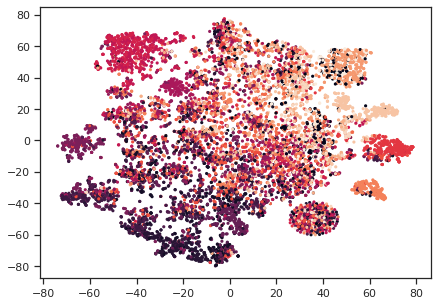

In [14]:
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()